# Structure of this project:
* **Parts 1-3** : Covid-19 dataset with the number of total cases for different countries at the end of each day
* **Part 4** : Covid-19 dataset with the total number of deaths for each country at the end of each day. 
* **Part 5** : Apply PCA to images using the MNIST dataset of handwritten digits

# Part 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

22-Jan  23-Jan  24-Jan  ...  10-Oct  11-Oct  12-Oct
Afghanistan              0       0       0  ...   39703   39799   39870
Albania                  0       0       0  ...   15231   15399   15570
Algeria                  0       0       0  ...   52940   53072   53325
Andorra                  0       0       0  ...    2696    2696    2995
Angola                   0       0       0  ...    6246    6366    6488
...                    ...     ...     ...  ...     ...     ...     ...
West Bank and Gaza       0       0       0  ...   43945   44299   44684
Western Sahara           0       0       0  ...      10      10      10
Yemen                    0       0       0  ...    2051    2052    2052
Zambia                   0       0       0  ...   15415   15458   15549
Zimbabwe                 0       0       0  ...    8010    8011    8021

[189 rows x 265 columns]

### 1. Plotting time-series. 

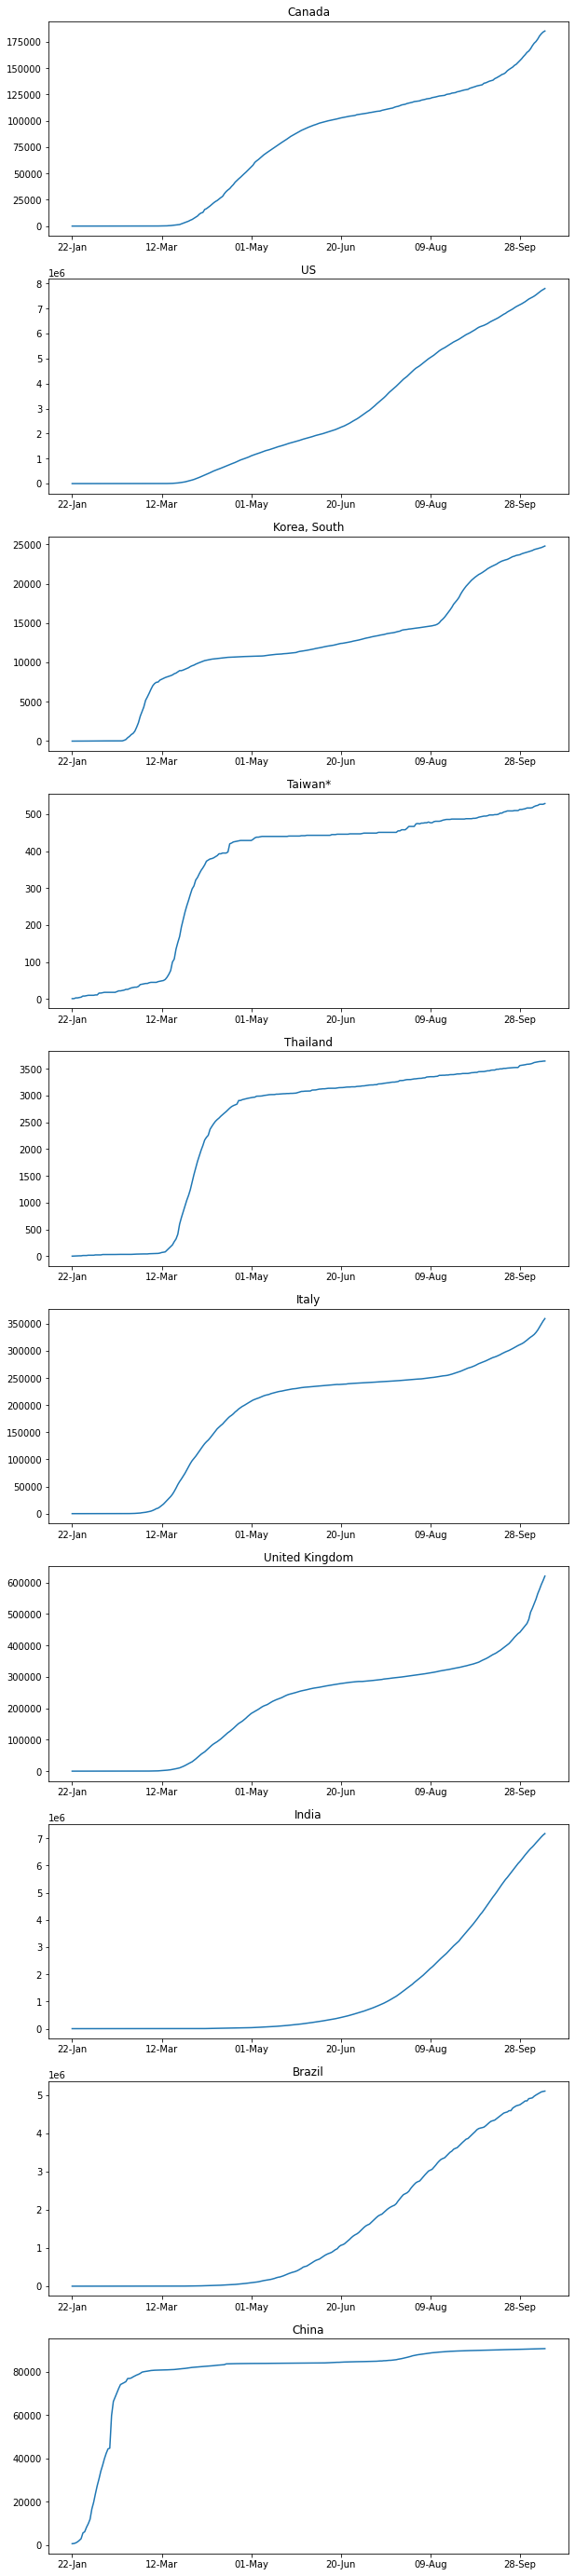

In [ ]:
cases_raw_t = cases_raw.transpose()
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10,50))
cases_raw_t["Canada"].plot(ax=axes[0])
axes[0].title.set_text('Canada')
cases_raw_t["US"].plot(ax=axes[1])
axes[1].title.set_text('US')
cases_raw_t["Korea, South"].plot(ax=axes[2])
axes[2].title.set_text('Korea, South')
cases_raw_t["Taiwan*"].plot(ax=axes[3])
axes[3].title.set_text('Taiwan*')
cases_raw_t["Thailand"].plot(ax=axes[4])
axes[4].title.set_text('Thailand')
cases_raw_t["Italy"].plot(ax=axes[5])
axes[5].title.set_text('Italy')
cases_raw_t["United Kingdom"].plot(ax=axes[6])
axes[6].title.set_text('United Kingdom')
cases_raw_t["India"].plot(ax=axes[7])
axes[7].title.set_text('India')
cases_raw_t["Brazil"].plot(ax=axes[8])
axes[8].title.set_text('Brazil')
cases_raw_t["China"].plot(ax=axes[9])
axes[9].title.set_text('China')

### 2. Scaling data.

In [ ]:
scaler = StandardScaler()
cases_raw_scaled = cases_raw.copy()
for col in cases_raw.columns:
    cases_raw_scaled[col] = scaler.fit_transform(np.array(cases_raw[col]).reshape(-1, 1))
cases_raw_scaled

22-Jan    23-Jan    24-Jan  ...    10-Oct    11-Oct    12-Oct
Afghanistan        -0.073868 -0.074185 -0.074604  ... -0.184782 -0.185131 -0.185964
Albania            -0.073868 -0.074185 -0.074604  ... -0.213555 -0.213634 -0.214183
Algeria            -0.073868 -0.074185 -0.074604  ... -0.169218 -0.169626 -0.170339
Andorra            -0.073868 -0.074185 -0.074604  ... -0.228293 -0.228473 -0.228786
Angola             -0.073868 -0.074185 -0.074604  ... -0.224119 -0.224186 -0.224730
...                      ...       ...       ...  ...       ...       ...       ...
West Bank and Gaza -0.073868 -0.074185 -0.074604  ... -0.179794 -0.179874 -0.180374
Western Sahara     -0.073868 -0.074185 -0.074604  ... -0.231451 -0.231610 -0.232253
Yemen              -0.073868 -0.074185 -0.074604  ... -0.229051 -0.229225 -0.229881
Zambia             -0.073868 -0.074185 -0.074604  ... -0.213338 -0.213565 -0.214208
Zimbabwe           -0.073868 -0.074185 -0.074604  ... -0.222045 -0.222264 -0.222950

[189 rows x 265 columns]

### 3. Plotting standardized time-series for the same countries in `Step 1`. 

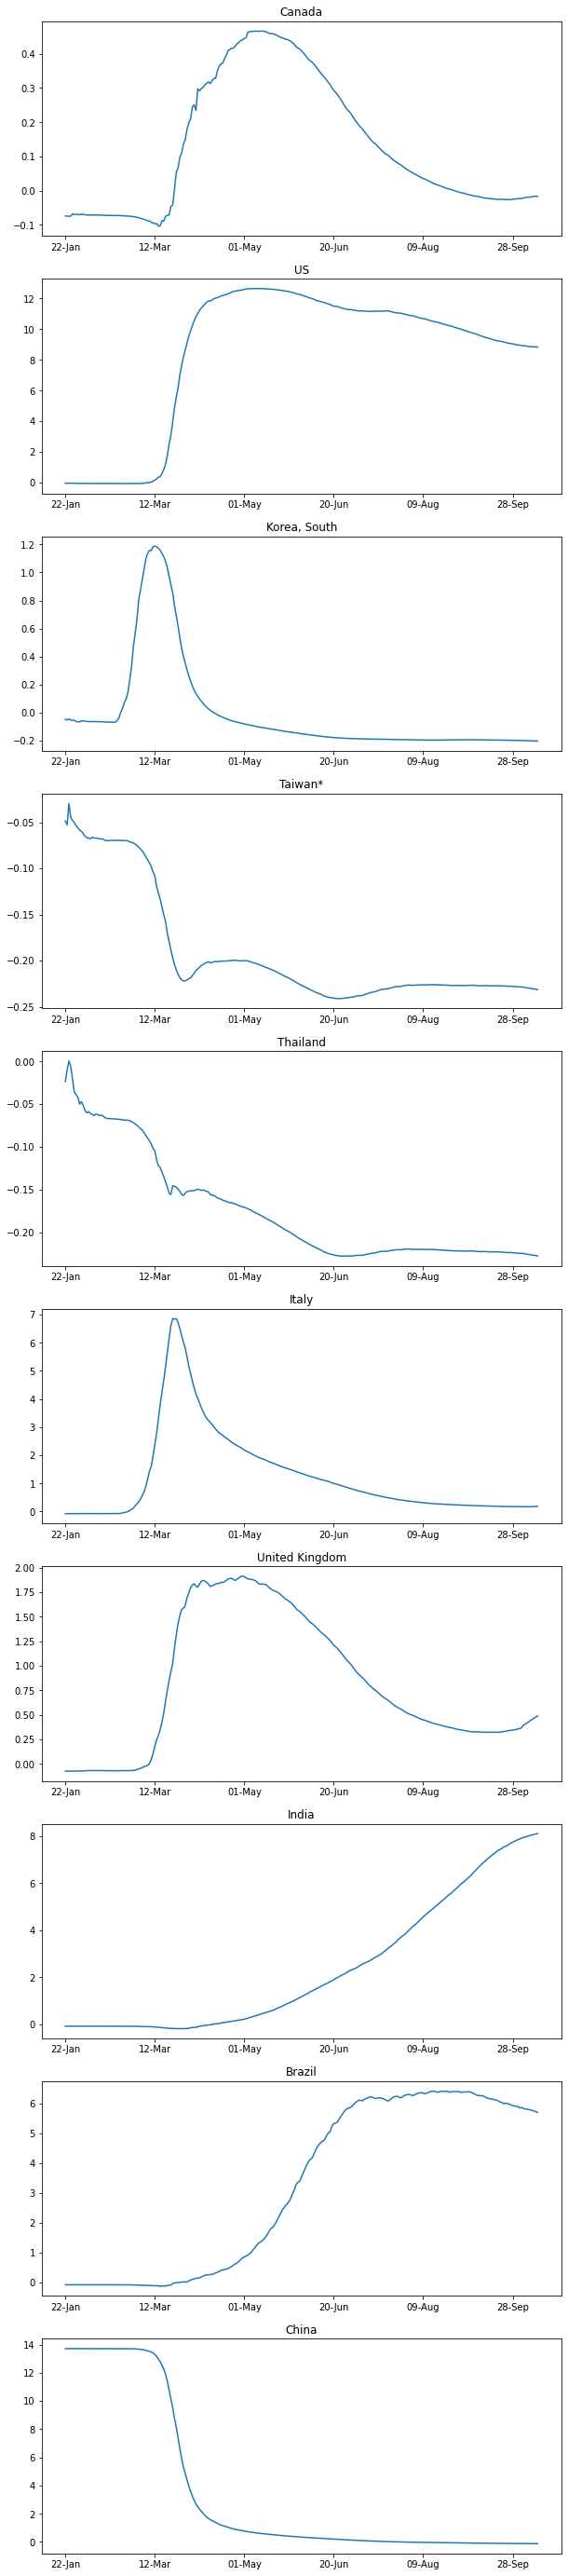

In [ ]:
cases_raw_t = cases_raw_scaled.transpose()
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10,50))
cases_raw_t["Canada"].plot(ax=axes[0])
axes[0].title.set_text('Canada')
cases_raw_t["US"].plot(ax=axes[1])
axes[1].title.set_text('US')
cases_raw_t["Korea, South"].plot(ax=axes[2])
axes[2].title.set_text('Korea, South')
cases_raw_t["Taiwan*"].plot(ax=axes[3])
axes[3].title.set_text('Taiwan*')
cases_raw_t["Thailand"].plot(ax=axes[4])
axes[4].title.set_text('Thailand')
cases_raw_t["Italy"].plot(ax=axes[5])
axes[5].title.set_text('Italy')
cases_raw_t["United Kingdom"].plot(ax=axes[6])
axes[6].title.set_text('United Kingdom')
cases_raw_t["India"].plot(ax=axes[7])
axes[7].title.set_text('India')
cases_raw_t["Brazil"].plot(ax=axes[8])
axes[8].title.set_text('Brazil')
cases_raw_t["China"].plot(ax=axes[9])
axes[9].title.set_text('China')

### 4. Notable Trends


**1) Canada** :

The curve started going up drastically from around the 12th of March to the beginning of April. Then the slope decreased a little bit, but the curve still constantly increased up until about mid-May. Then, from mid-May, the curve started going down with a negative slope slowly decreasing in absolute value until reaching 0 in late September. Afterwards, it started increasing again very slightly.

**2) US** :

The curve started going up even more drastically to much higher value than Canada from around the 12th of March to the beginning-mid of April, then its slope decreased drastically to show almost a flattening effect. After around mid-May, the curve started going down slowly, at a much smaller slope than Canada. It is still at a valud aroud 9 in early October.

**3) China** :

The curve started higher than Canada or US, stayed constant at a high point until around the 12th of March. Then, it went down drastically to until late April, and then afterwards slowly decreased more until reaching 0 at around early August. It is keeping at 0 until early October.

The curve going up means the relative number of new patients increased much more than before, while the curve going down means the relative number of new patients decreased compared to earlier in the timeline. 

Positive values mean that the number of total cases in that country is higher than the daily average across ALL 189 countries in the dataframe. Similarly, negative values mean that the number of total cases in that country is lower than the daily average across all 189 countries in the dataframe.

# Part 2: Applying PCA 

### 1. Covariance matrix of the dataframe

In [ ]:
cov = cases_raw_scaled.cov()
cov

22-Jan    23-Jan    24-Jan  ...    10-Oct    11-Oct    12-Oct
22-Jan  1.005319  1.005312  1.005305  ... -0.008115 -0.008176 -0.008268
23-Jan  1.005312  1.005319  1.005312  ... -0.008365 -0.008425 -0.008518
24-Jan  1.005305  1.005312  1.005319  ... -0.007910 -0.007972 -0.008058
25-Jan  1.005307  1.005311  1.005314  ... -0.008367 -0.008428 -0.008514
26-Jan  1.005310  1.005310  1.005311  ... -0.007755 -0.007817 -0.007905
...          ...       ...       ...  ...       ...       ...       ...
08-Oct -0.007947 -0.008197 -0.007743  ...  1.005306  1.005287  1.005257
09-Oct -0.008038 -0.008287 -0.007831  ...  1.005315  1.005303  1.005284
10-Oct -0.008115 -0.008365 -0.007910  ...  1.005319  1.005315  1.005299
11-Oct -0.008176 -0.008425 -0.007972  ...  1.005315  1.005319  1.005308
12-Oct -0.008268 -0.008518 -0.008058  ...  1.005299  1.005308  1.005319

[265 rows x 265 columns]

Diagonals of the covariance matrix contain equal values = 1.005319

### 2. Eigenvalues and eigenvectors 

In [ ]:
eigenval, eigenvec = np.linalg.eigh(cov)
eigenval.shape, eigenvec.shape

((265,), (265, 265))

In [ ]:
# sort eigenvalues in descending order
args = (-eigenval).argsort()
eigenval = eigenval[args]

# sort eigenvectors matching with the descending order of eigenvalues & rearange it so that eigenvec[i] = ith eigenvector
eigenvec = np.array([eigenvec[:, args][:,i] for i in range(len(eigenvec))])
eigenval[:10]

array([1.79910348e+02, 6.20997612e+01, 1.88571712e+01, 3.72685968e+00,
       1.36617527e+00, 2.51486418e-01, 1.23097195e-01, 3.69754003e-02,
       1.80533491e-02, 5.90756588e-03])

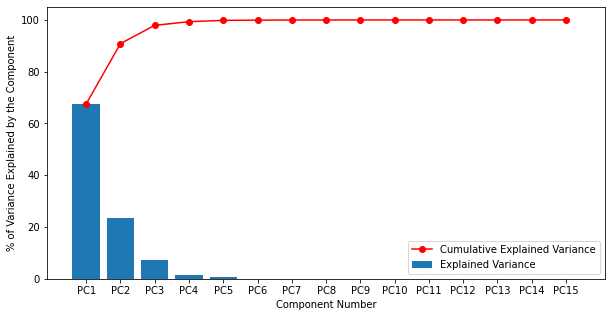

In [ ]:
eigenValSum = sum(eigenval)
n_components = 15
expVar = [(eigV/sum(eigenval))*100 for eigV in eigenval[:n_components]]
cumExpVar = np.cumsum(expVar)
plt.bar(range(n_components), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.rcParams["figure.figsize"] = [10,5]
plt.legend()
plt.xticks(np.arange(n_components), ["PC"+str(i+1) for i in range(n_components)])
plt.xlabel("Component Number")
plt.ylabel("% of Variance Explained by the Component")
plt.show()

In [ ]:
np.cumsum(expVar[:10])

array([67.53148737, 90.84137079, 97.91963412, 99.31855519, 99.83136531,
       99.92576373, 99.97196972, 99.98584888, 99.99262542, 99.99484289])

Looking at the cumulative sum array above, I need **4 PCs to cover 99%.**

### 5. Plotting first 20 principal components (Eigenvectors) as a time series 

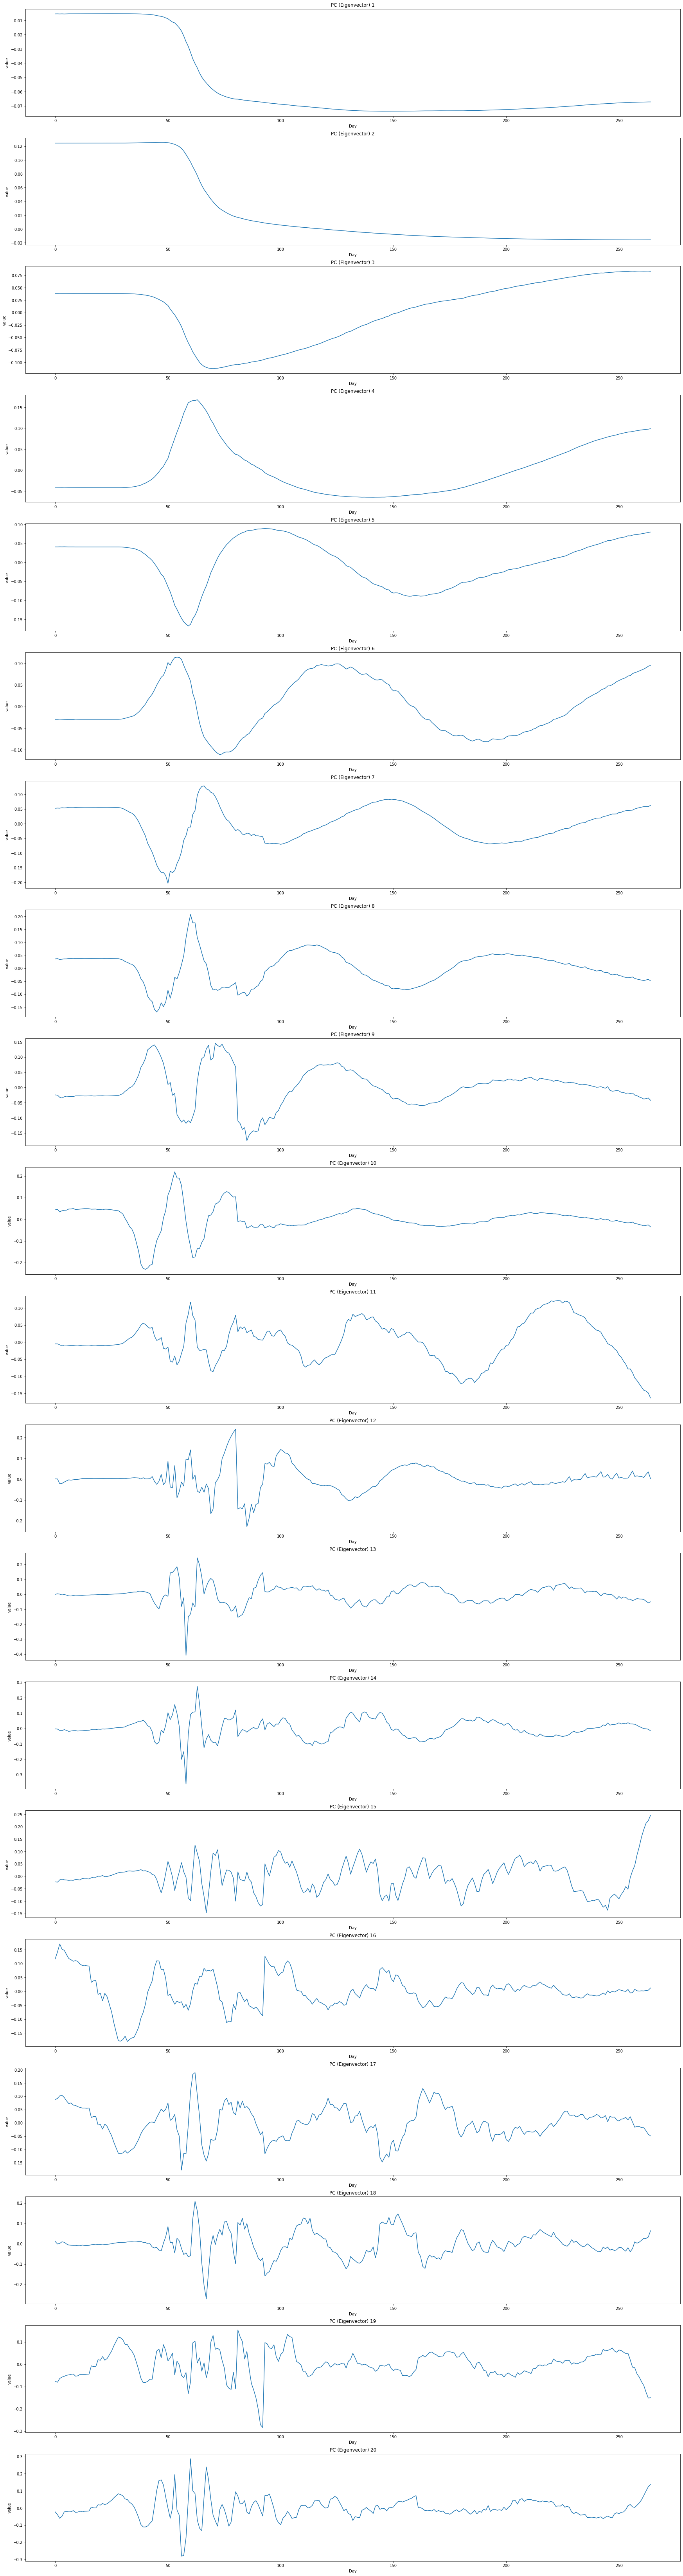

In [ ]:
fig, axes = plt.subplots(20,1, figsize=(30,120))
for i in range(20):
    axes[i].plot(eigenvec[i])
    axes[i].title.set_text("PC (Eigenvector) "+str(i+1))
    axes[i].set_xlabel("Day")
    axes[i].set_ylabel("value")

### 6. Comparison of the first few PCs with the rest of them


As we go from the earlier PCs to later ones, there seems to be more fluctuations in the feature weights (curves are less smooth and more jagged). This could mean that the earlier PCs look at the general major trends in the data, whereas the later ones tend to weigh individual days separately. Using later PCs would result in overfitting, as the weights are too specific.



# Part 3: Data Reconstruction 

I will create a Function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   Standardized time-series for the specified country. 
2.   Incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components 
  
  (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). 
3.   Residual error of reconstruction for each 10 reconstructions w.r.t standardized time-series. 
4.   RMSE of reconstruction as a function of number of included components. 
*   Print how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. 



In [ ]:
from sklearn.metrics import mean_squared_error

To make the function more customizable, I will also take ***scaled dataframe* as input as well.**

In [ ]:
def pca_process(scaled_df, country):
    assert country in scaled_df.index, "INVALID : The country is NOT in the dataframe!"
    plt.rcParams["figure.figsize"] = [10, 5]
    ####### 1 #######
    scaled_df.transpose()[country].plot() 
    plt.title("{} : Original Scaled Data".format(country))
    plt.show()
    country_idx = np.argmax(scaled_df.index == country)

    residuals = []
    rmse_sk = []
    for n_components in range(1, 10+1):
        ####### 2 #######
        W = eigenvec[:n_components].T     
        proj = np.dot(scaled_df, W) 
        reconst = np.dot(proj, W.T)       

        plt.plot(reconst[country_idx])
        plt.title("{} : Reconstruction Plot with 1-10 Principal Components".format(country))
        plt.legend(["{} components".format(i) for i in range(1, 10+1)])

        ####### 3 #######
        # residual error = expected - predicted
        residuals.append(scaled_df.loc[country] - reconst[country_idx])

        ####### 4 #######
        rmse_sk.append(mean_squared_error(scaled_df.loc[country], reconst[country_idx]))
    plt.show() #2
    
    ####### 3 #######
    plt.plot(np.array(residuals).transpose())
    plt.title("{} : Residual Error with 1-10 Principal Components".format(country))
    plt.legend(["{} components".format(i) for i in range(1, 10+1)])
    plt.xlabel("Day")
    plt.show()

    ####### 4 #######
    rmse_sk = np.sqrt(rmse_sk)
    plt.plot(range(1,11), np.array(rmse_sk))
    plt.title("{} : RMSE sklearn with 1-10 Principal Components".format(country))
    plt.xlabel("Number of Principal Components")
    plt.ylabel("RMSE")
    plt.xticks(range(1,11))
    plt.show()

    # Print how many PCs are needed so that the RMSE would be less than 1, 0.1, and  0.01
    for val in [1., 0.1, 0.01]:
        print("For {}, {} PC(s) are needed for RMSE < {}".format(country, sum(rmse_sk > val)+1, val))

### Ｃａｎａｄａ

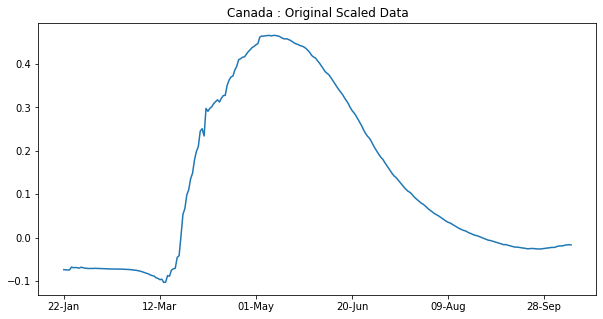

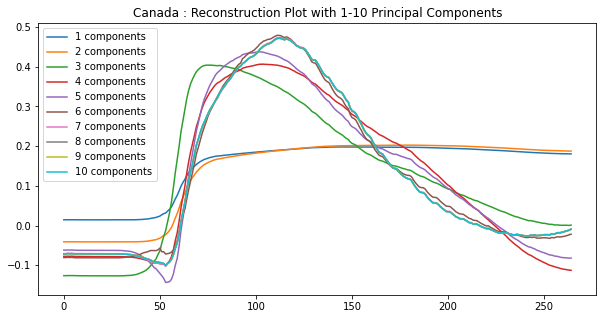

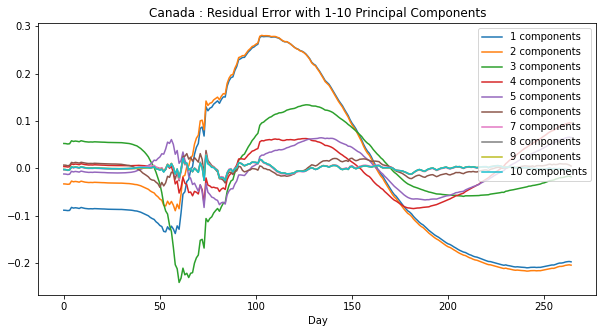

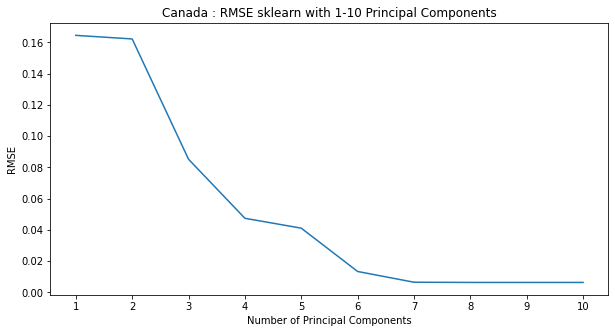

For Canada, 1 PC(s) are needed for RMSE < 1.0
For Canada, 3 PC(s) are needed for RMSE < 0.1
For Canada, 7 PC(s) are needed for RMSE < 0.01


In [ ]:
pca_process(cases_raw_scaled, "Canada")

### ＵＳ

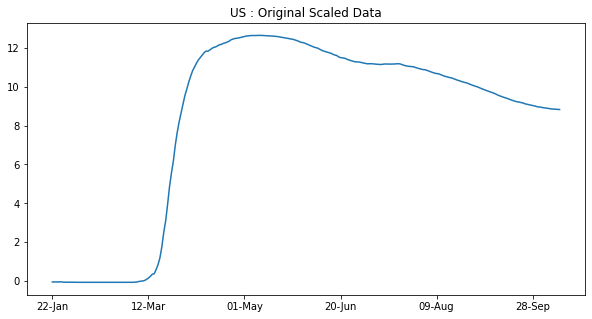

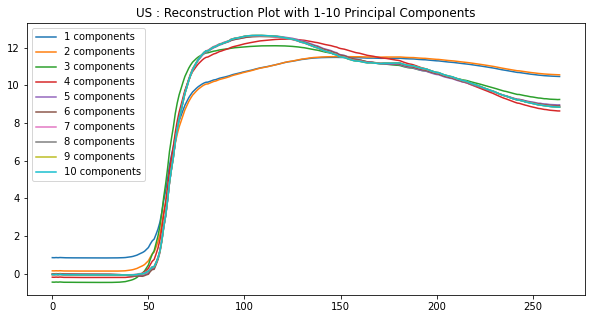

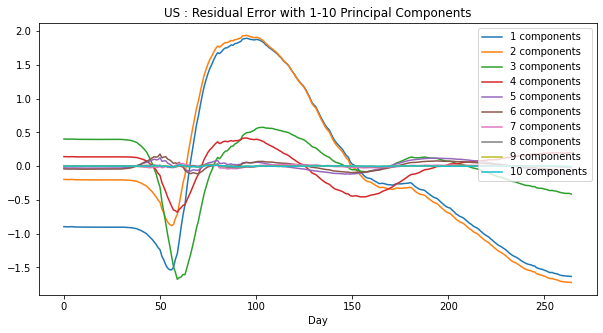

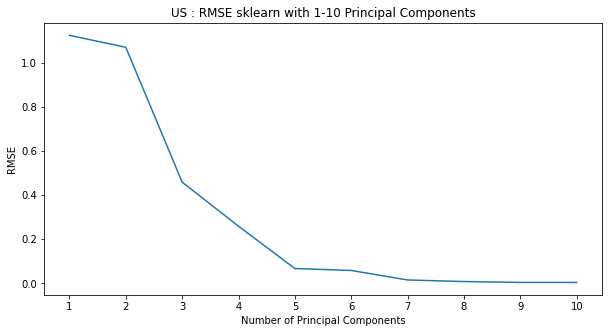

For US, 3 PC(s) are needed for RMSE < 1
For US, 5 PC(s) are needed for RMSE < 0.1
For US, 8 PC(s) are needed for RMSE < 0.01


In [ ]:
pca_process(cases_raw_scaled, "US")

### Ｃｈｉｎａ

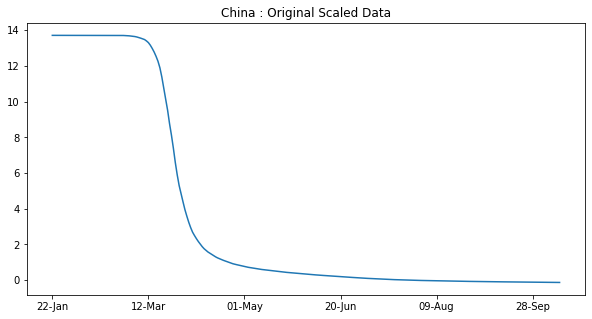

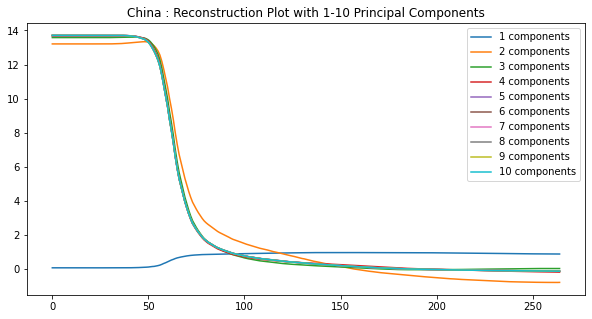

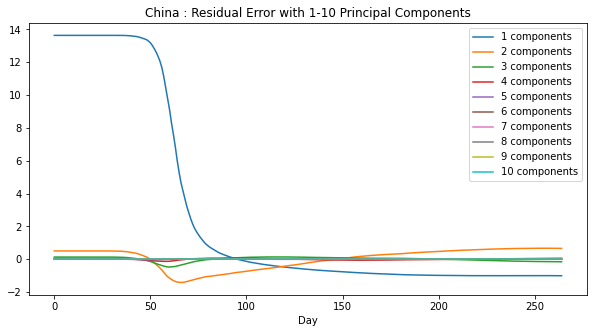

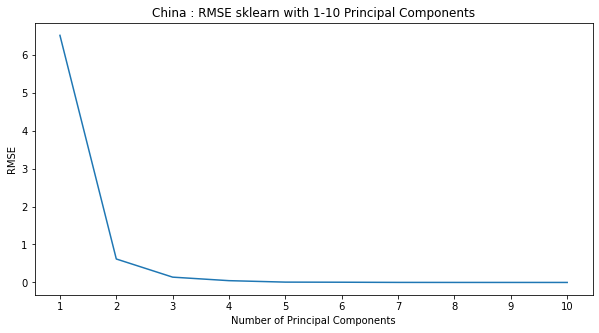

For China, 2 PC(s) are needed for RMSE < 1
For China, 4 PC(s) are needed for RMSE < 0.1
For China, 5 PC(s) are needed for RMSE < 0.01


In [ ]:
pca_process(cases_raw_scaled, "China")

### Comments
Looking at the three countries' results and plots, it seems like at least 5~6 components must be used to match the original data well.

# Part 4: Time-series analysis on death cases 
Here, we'll use another dataset for **total deaths caused by COVID-19** for different countries. 

I will call the function in *Part 3* with this new dataset. 


In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
death_raw.head(3)

22-Jan  23-Jan  24-Jan  25-Jan  ...  09-Oct  10-Oct  11-Oct  12-Oct
Afghanistan       0       0       0       0  ...    1472    1473    1477    1479
Albania           0       0       0       0  ...     413     416     420     424
Algeria           0       0       0       0  ...    1789    1795    1801    1809

[3 rows x 265 columns]

In [ ]:
scaler = StandardScaler()
death_raw_scaled = death_raw.copy()
for col in death_raw.columns:
    death_raw_scaled[col] = scaler.fit_transform(np.array(death_raw[col]).reshape(-1, 1))
death_raw_scaled

22-Jan    23-Jan    24-Jan  ...    10-Oct    11-Oct    12-Oct
Afghanistan        -0.072932 -0.072932 -0.072932  ... -0.190626 -0.190875 -0.191285
Albania            -0.072932 -0.072932 -0.072932  ... -0.238560 -0.238683 -0.238893
Algeria            -0.072932 -0.072932 -0.072932  ... -0.176024 -0.176221 -0.176393
Andorra            -0.072932 -0.072932 -0.072932  ... -0.254931 -0.255192 -0.255455
Angola             -0.072932 -0.072932 -0.072932  ... -0.247539 -0.247819 -0.248144
...                      ...       ...       ...  ...       ...       ...       ...
West Bank and Gaza -0.072932 -0.072932 -0.072932  ... -0.240284 -0.240447 -0.240563
Western Sahara     -0.072932 -0.072932 -0.072932  ... -0.257380 -0.257634 -0.257982
Yemen              -0.072932 -0.072932 -0.072932  ... -0.230443 -0.230768 -0.231132
Zambia             -0.072932 -0.072932 -0.072932  ... -0.242143 -0.242437 -0.242458
Zimbabwe           -0.072932 -0.072932 -0.072932  ... -0.246995 -0.247276 -0.247648

[189 rows x 265 columns]

In [ ]:
def compute_eigen(scaled_df, n_components = 15, figsize = [10,5], xticks=True):
    cov = scaled_df.cov()
    eigenval, eigenvec = np.linalg.eigh(cov)
    # sort eigenvalues in descending order
    args = (-eigenval).argsort()
    eigenval = eigenval[args]

    # sort eigenvectors matching with the descending order of eigenvalues & rearange it so that eigenvec[i] = ith eigenvector
    eigenvec = np.array([eigenvec[:, args][:,i] for i in range(len(eigenvec))])

    eigenValSum = sum(eigenval)
    expVar = [(eigV/sum(eigenval))*100 for eigV in eigenval[:n_components]]
    cumExpVar = np.cumsum(expVar)
    plt.bar(range(n_components), expVar, label='Explained Variance')
    plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
    plt.rcParams["figure.figsize"] = figsize
    plt.legend()
    if xticks:
        plt.xticks(np.arange(n_components), ["PC"+str(i+1) for i in range(n_components)])
    plt.xlabel("Component Number")
    plt.ylabel("% of Variance Explained by the Component")
    plt.show()

    return eigenval, eigenvec, expVar, cumExpVar

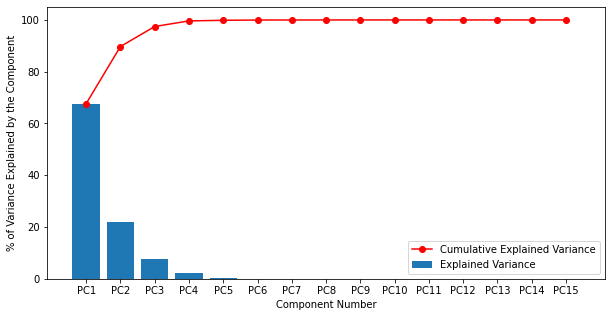

In [ ]:
eigenval_death, eigenvec_death, expVar_death, cumExpVar_death = compute_eigen(death_raw_scaled)

In [ ]:
cumExpVar_death

array([67.65653395, 89.72478867, 97.46016907, 99.62997172, 99.86177852,
       99.96646288, 99.98673304, 99.99370943, 99.99590624, 99.9974685 ,
       99.99821564, 99.99859095, 99.9989341 , 99.99919707, 99.99938327])

Just like the number of patients data, I need **4 PCs to cover 99%.**

## Part 3 Plots

### Ｃａｎａｄａ

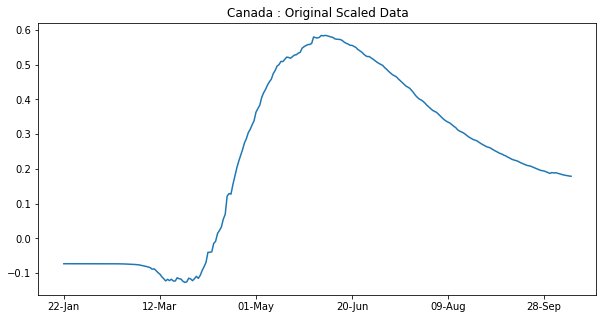

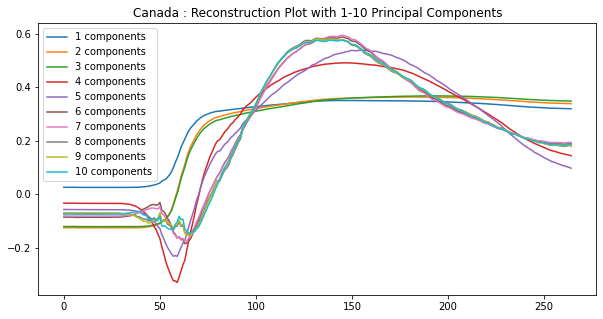

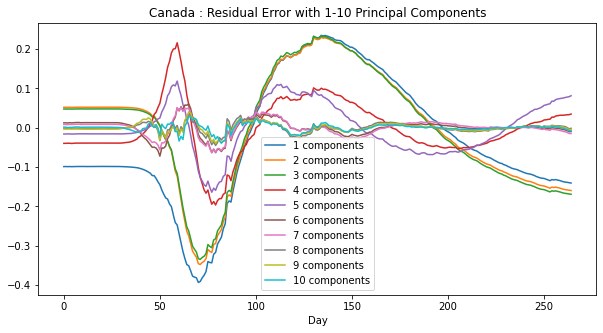

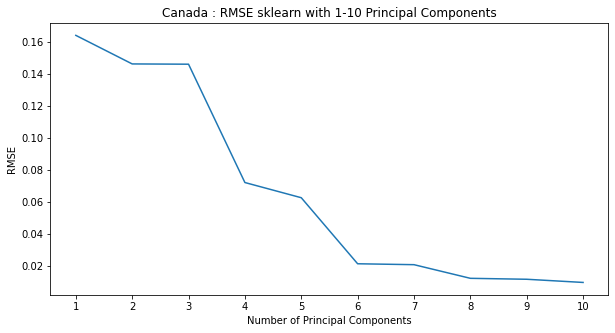

For Canada, 1 PC(s) are needed for RMSE < 1
For Canada, 4 PC(s) are needed for RMSE < 0.1
For Canada, 10 PC(s) are needed for RMSE < 0.01


In [ ]:
pca_process(death_raw_scaled, "Canada")

### ＵＳ

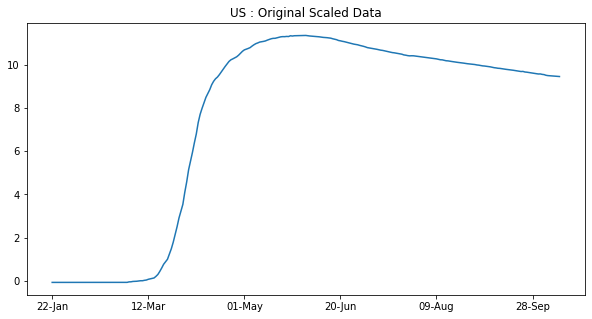

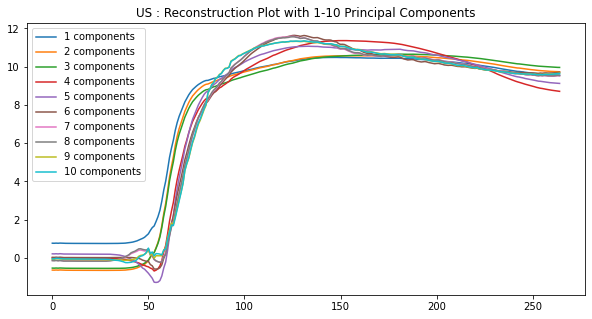

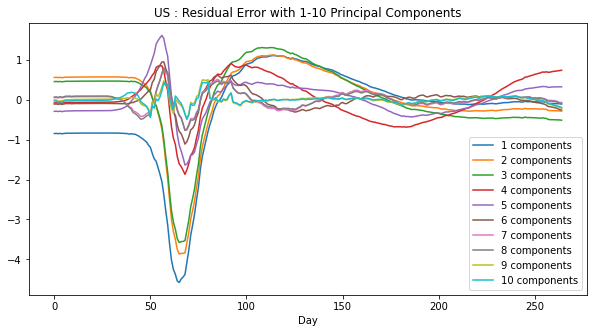

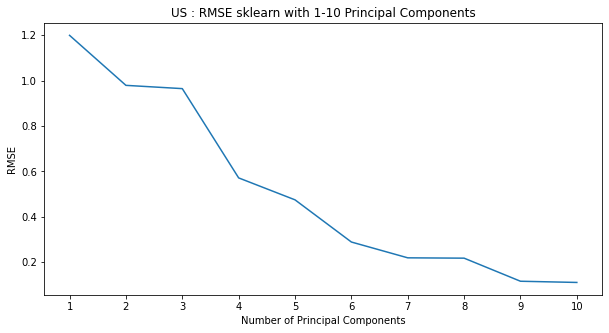

For US, 2 PC(s) are needed for RMSE < 1
For US, 11 PC(s) are needed for RMSE < 0.1
For US, 11 PC(s) are needed for RMSE < 0.01


In [ ]:
pca_process(death_raw_scaled, "US")

### Ｃｈｉｎａ


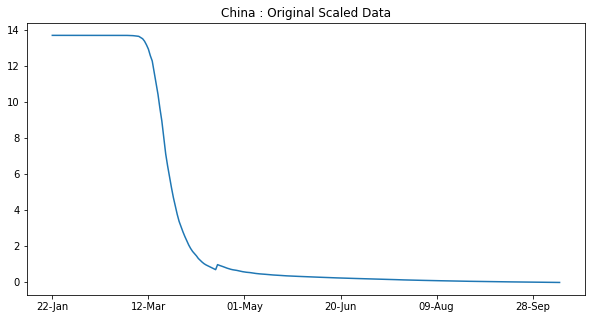

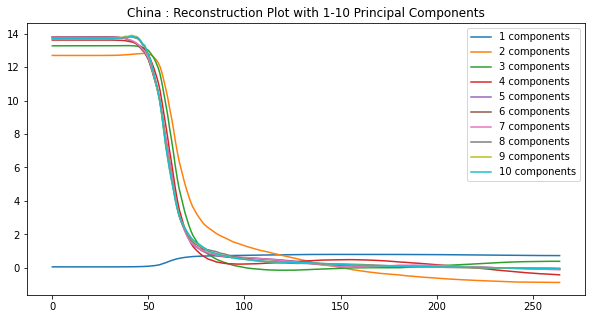

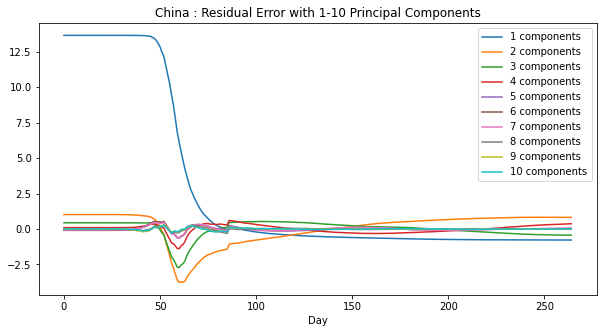

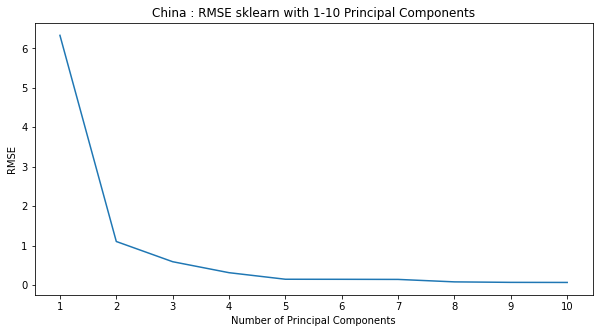

For China, 3 PC(s) are needed for RMSE < 1
For China, 8 PC(s) are needed for RMSE < 0.1
For China, 11 PC(s) are needed for RMSE < 0.01


In [ ]:
pca_process(death_raw_scaled, "China")

# Part 5: PCA with MNIST dataset 
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[:1000]
y = mnist.target[:1000]

In [ ]:
x.shape, y.shape

((1000, 784), (1000,))

Label is: 4


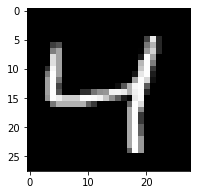

In [ ]:
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

### 1. Eigendecomposition

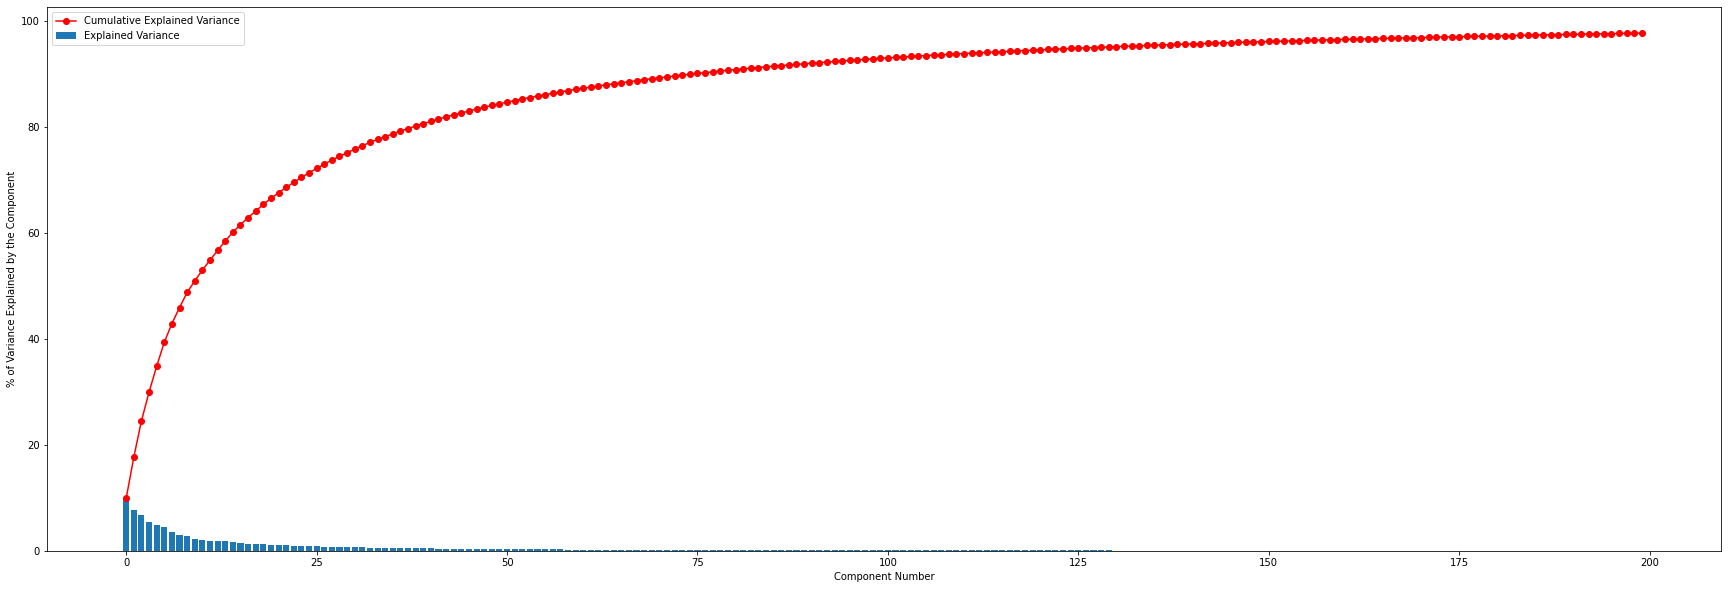

In [ ]:
eigenval_mnist, eigenvec_mnist, expVar_mnist, cumExpVar_mnist = compute_eigen(pd.DataFrame(x), n_components=200, figsize = [30,10], xticks=False)

In [ ]:
eigenval_mnist.shape, eigenvec_mnist.shape

((784,), (784, 784))

### 2. Plotting first 10 eigenvectors

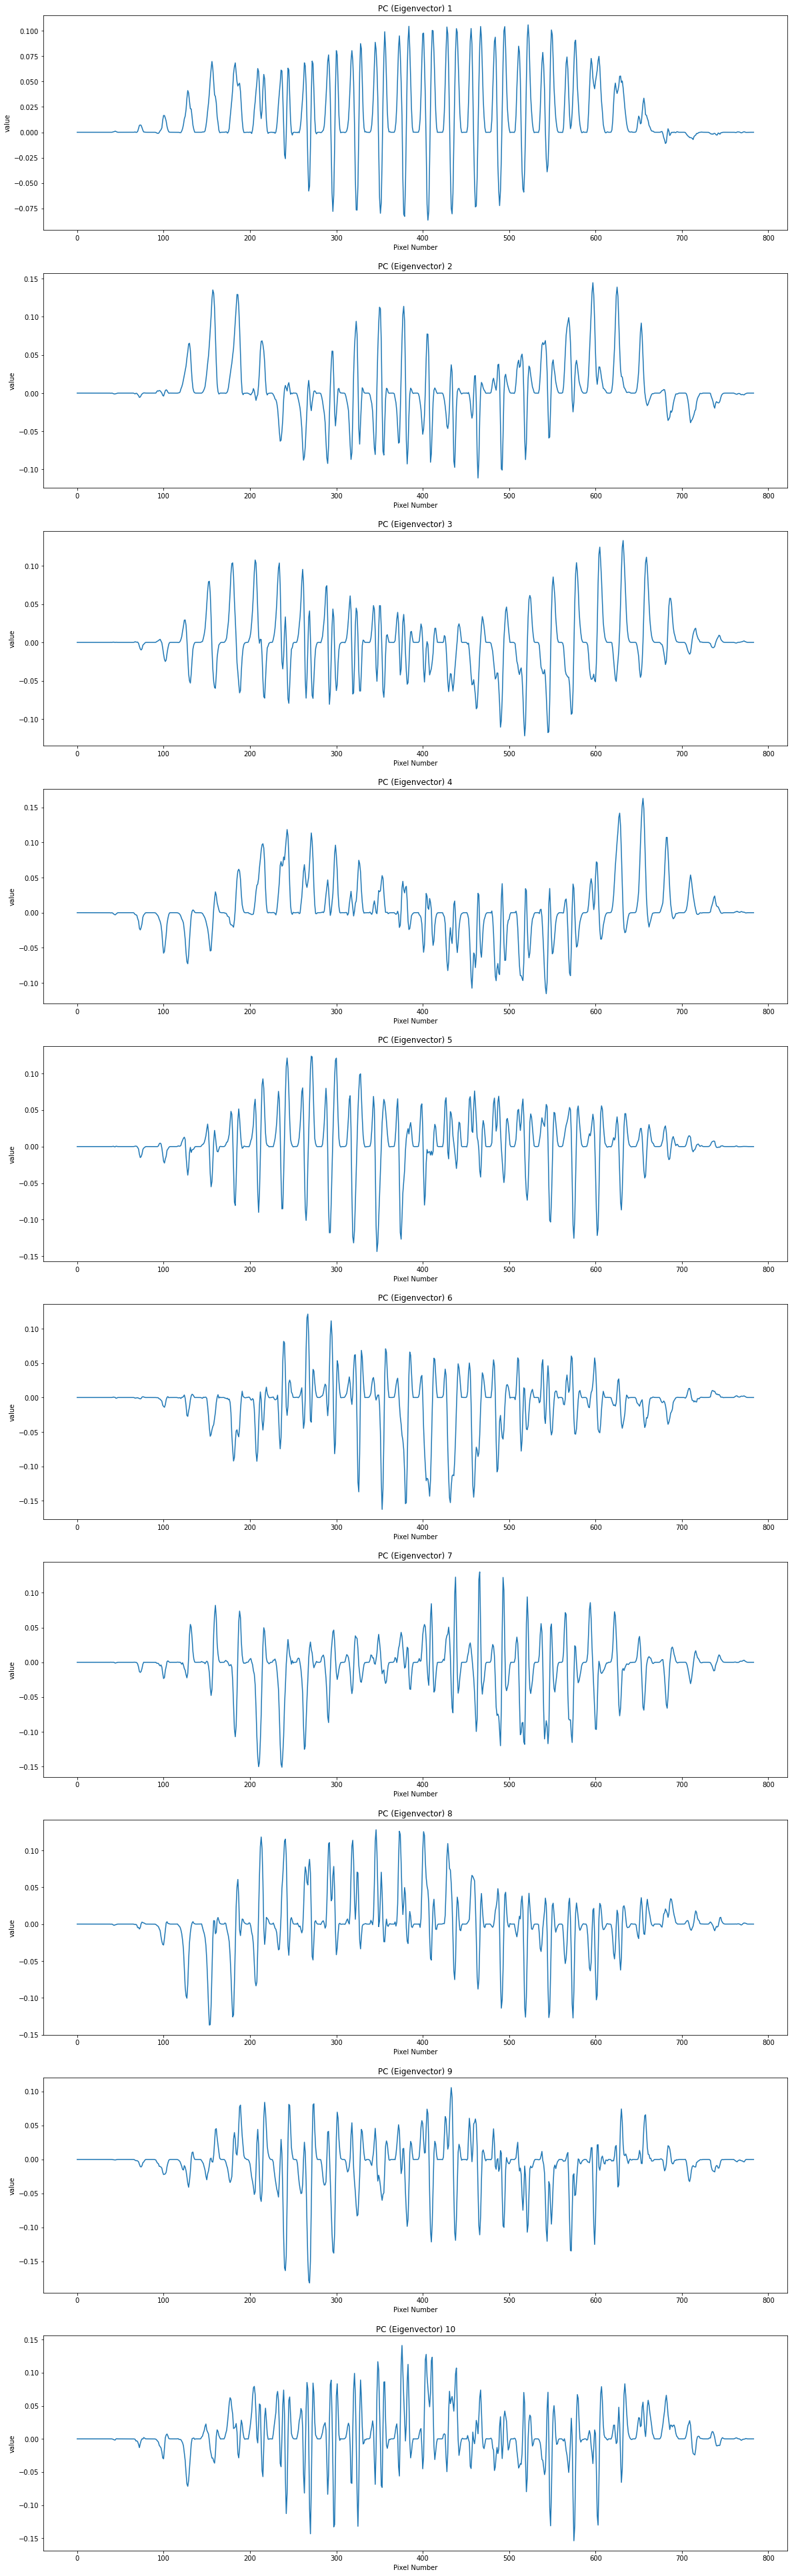

In [ ]:
fig, axes = plt.subplots(10,1, figsize=(20,70))
for i in range(10):
    axes[i].plot(eigenvec_mnist[i])
    axes[i].title.set_text("PC (Eigenvector) "+str(i+1))
    axes[i].set_xlabel("Pixel Number")
    axes[i].set_ylabel("value")

Unlike the eigenvector plots of covid cases that were smooth lines (at least for the first few plots), eigenvector plots of MNIST images are very spiky. I think this aspect is very expected, however, as the 784 x 1 array for an image is a *flattened version* of a 28 by 28 image. Regarding spatial relations of different strokes of a hand-written digit, each pixel must be related to not only the ones to its left and right, but also the ones above and below it. Thus, for example, a pixel element in the flattened array could be more related to another element 28 indices away (meaning that it was the pixel right below in the image) than the one 10 indices away (10 pixels to the right).

Moreover, weights of the first 60~70 elements and the last ~50 elements are near zero in all 10 PCs. This is also quite expected, as those elements represent little bit of the top-most and bottom-most parts of the image, which should be just backgrounds, and not too significant in detecting which number is in the image. 

In [ ]:
expVar_mnist[:10]

[9.931776126956107,
 7.7558315676304845,
 6.838247873728885,
 5.425497916806695,
 4.871298506436865,
 4.536464323423774,
 3.510726816880471,
 3.029976368201248,
 2.8581147461056577,
 2.162475048030636]

Looking at the explained variance of the first 10 PCs above, they are all relatively important, with the highest (first) one covering only ~10% of total variance. 

### 3. Reconstruction Function : 
* Accepts an argument $n$
* Plots a random image from the dataset
* Plots $n$ plots of its incremental reconstruction 
  * 1st reconstruction w/ PC1
  * 2nd w/ PC1+PC2
  * 3rd w/ PC1+PC2+PC3, etc. 

In [ ]:
def plot_reconst(n):
  plt.gray() 
  # plot a random image from the dataset
  plt.rcParams["figure.figsize"] = [2, 2]
  rand_idx = np.random.choice(range(1000))
  plt.imshow(x[rand_idx].reshape(28,28)) 
  plt.title("Original Image")
  plt.show()

  # if plotting >5 reconstructions, do so in 5 columns
  if n>5:
    n_rows = int(n/5) if n%5==0 else int(n/5)+1
    fig, axes = plt.subplots(n_rows, 5, figsize=[5*3, n_rows*3])
    for i in range(1, n+1):
      W = eigenvec_mnist[:i].T # [784, i]
      proj = np.dot(x, W)      # [1000, i]
      reconst = np.dot(proj, W.T) #[1000, 784]
      axes[int((i-1)/5), (i-1)%5].imshow(reconst[rand_idx].reshape(28, 28), aspect="auto")
      axes[int((i-1)/5), (i-1)%5].title.set_text("{} PC(s)".format(i))
  
  # if plotting <=5 reconstructions, just plot them on top of each other
  else:
    for i in range(1, n+1):
      W = eigenvec_mnist[:i].T # [784, i]
      proj = np.dot(x, W)      # [1000, i]
      reconst = np.dot(proj, W.T) #[1000, 784]
      plt.imshow(reconst[rand_idx].reshape(28, 28), aspect="auto")
      plt.title("{} PC(s)".format(i))
      plt.show()

#### Digit 5

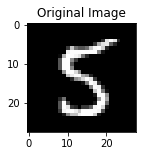

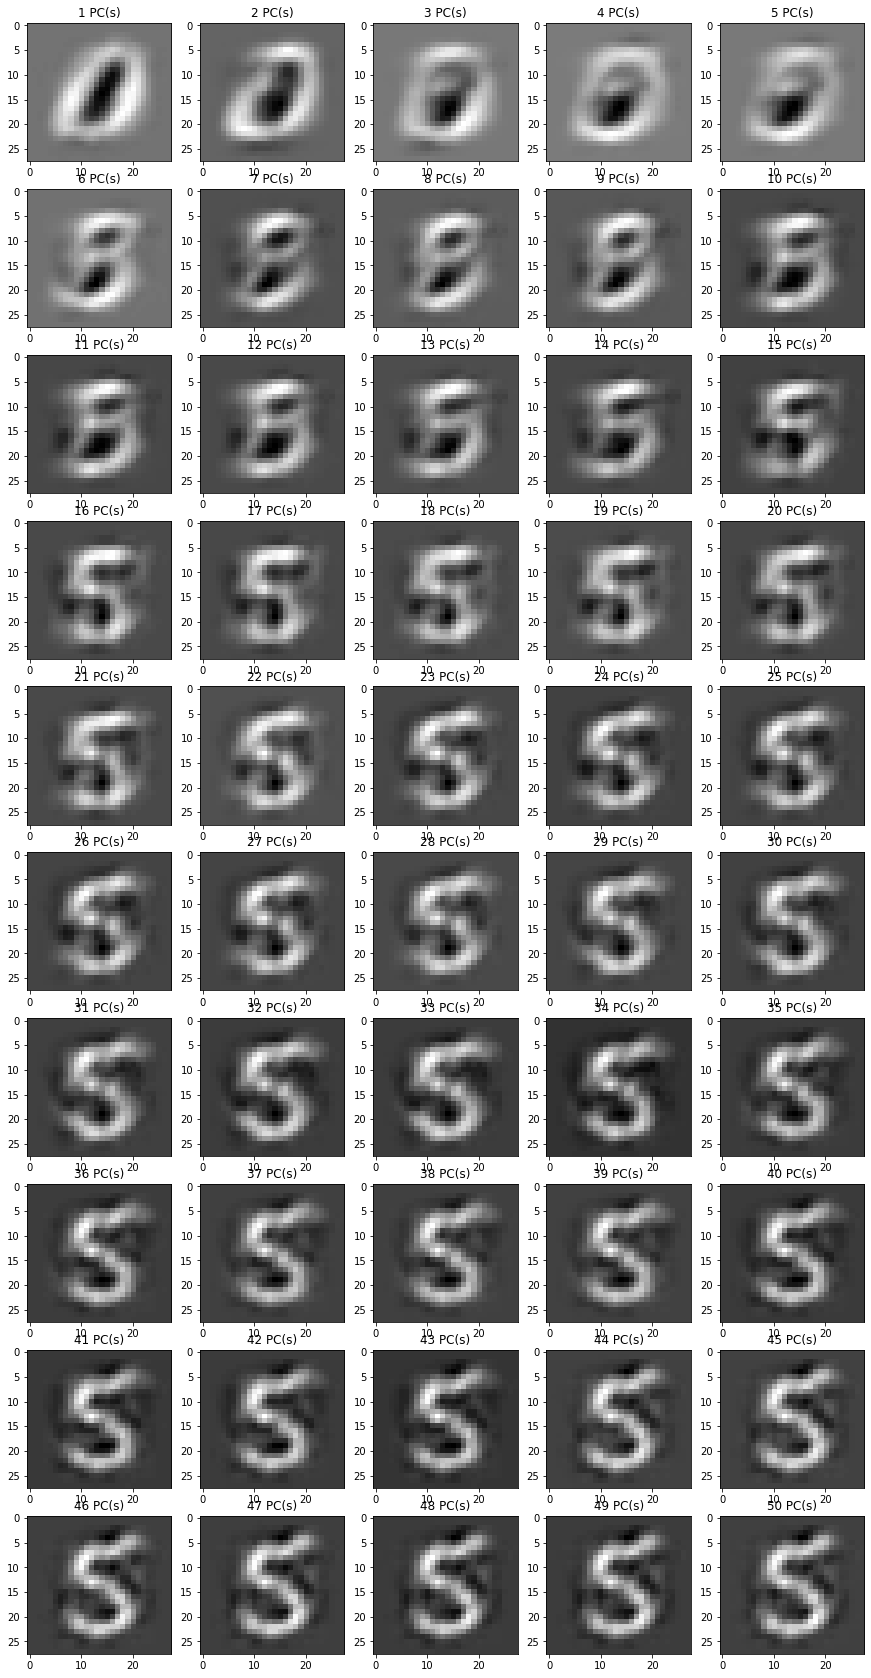

In [ ]:
plot_reconst(50)

#### Digit 1

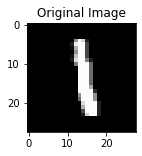

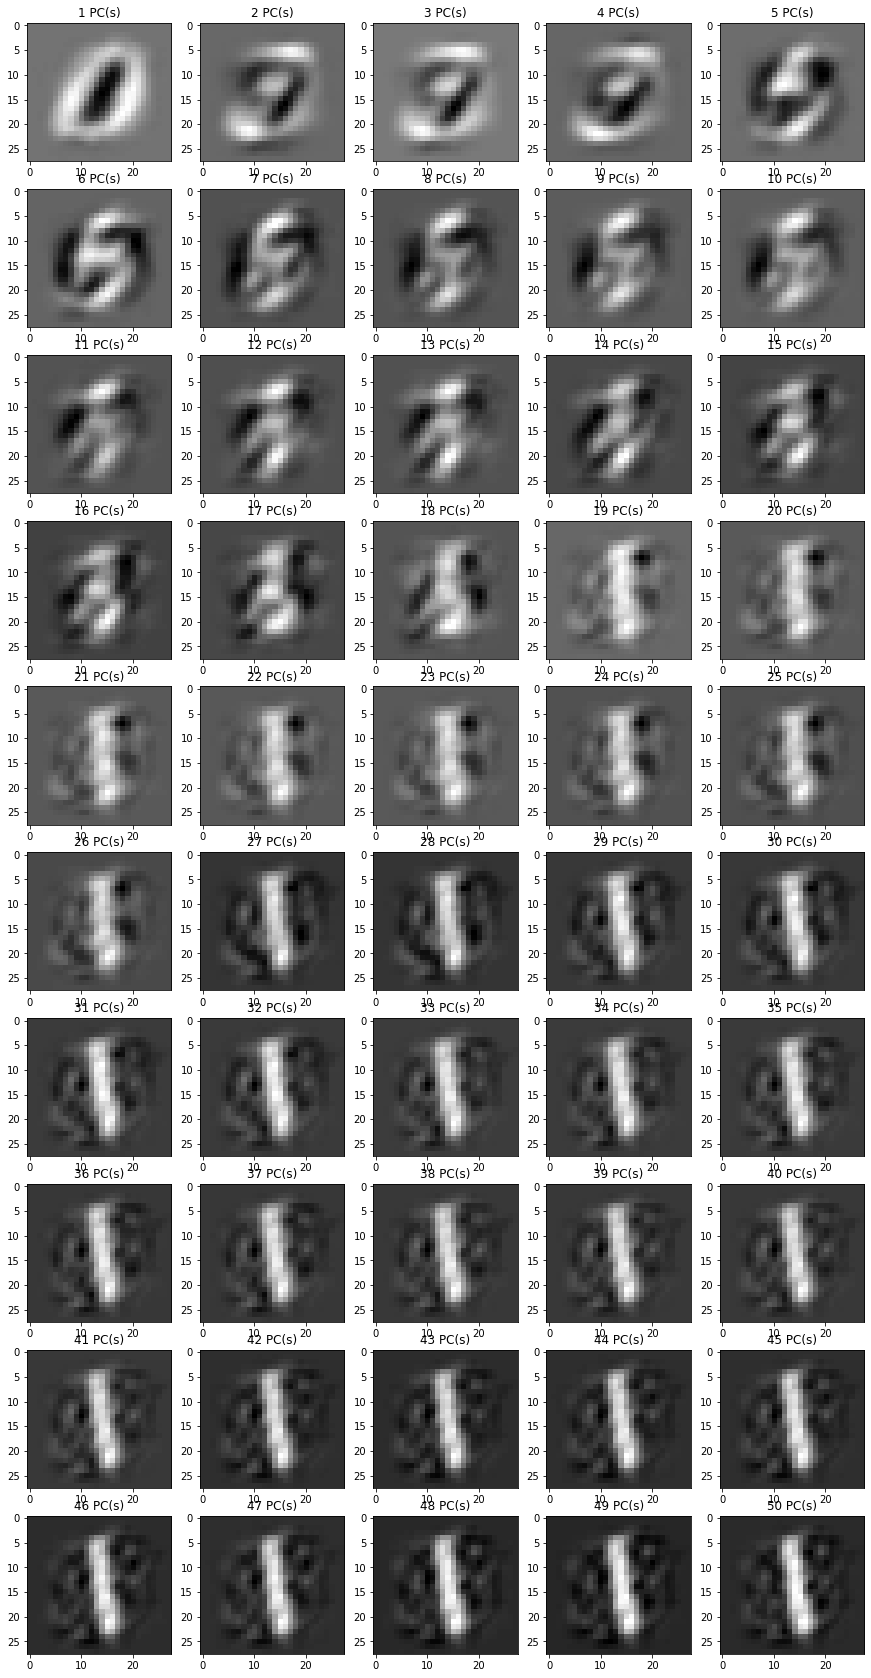

In [ ]:
plot_reconst(50)

#### Digit 9

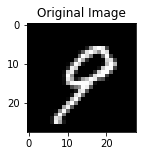

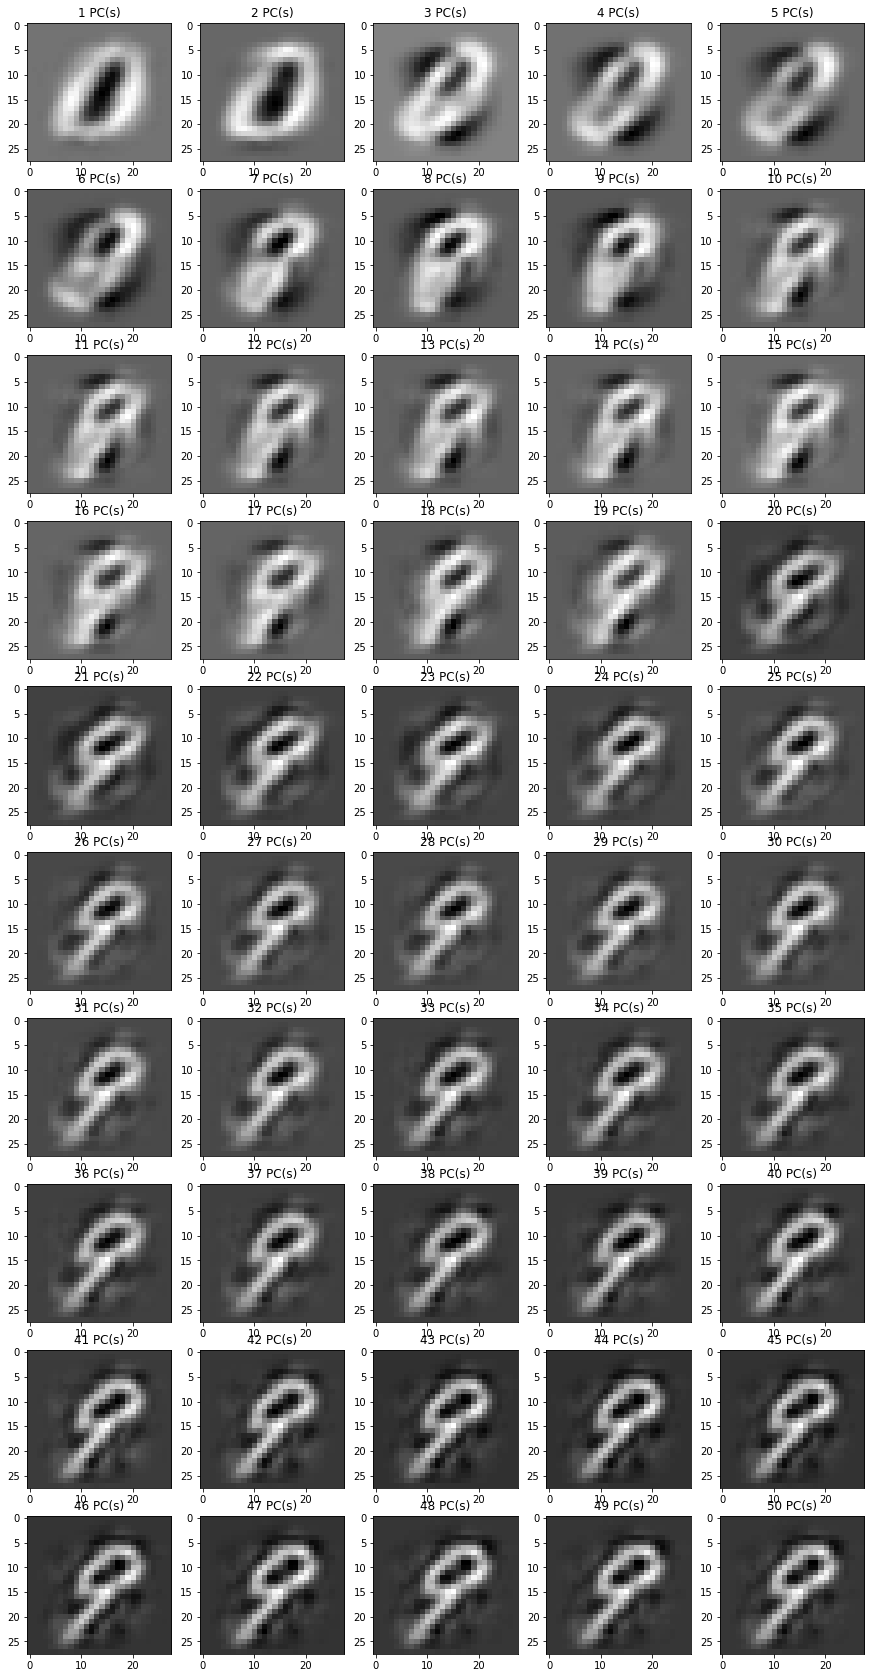

In [ ]:
plot_reconst(50)

#### Digit 2

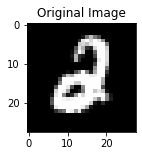

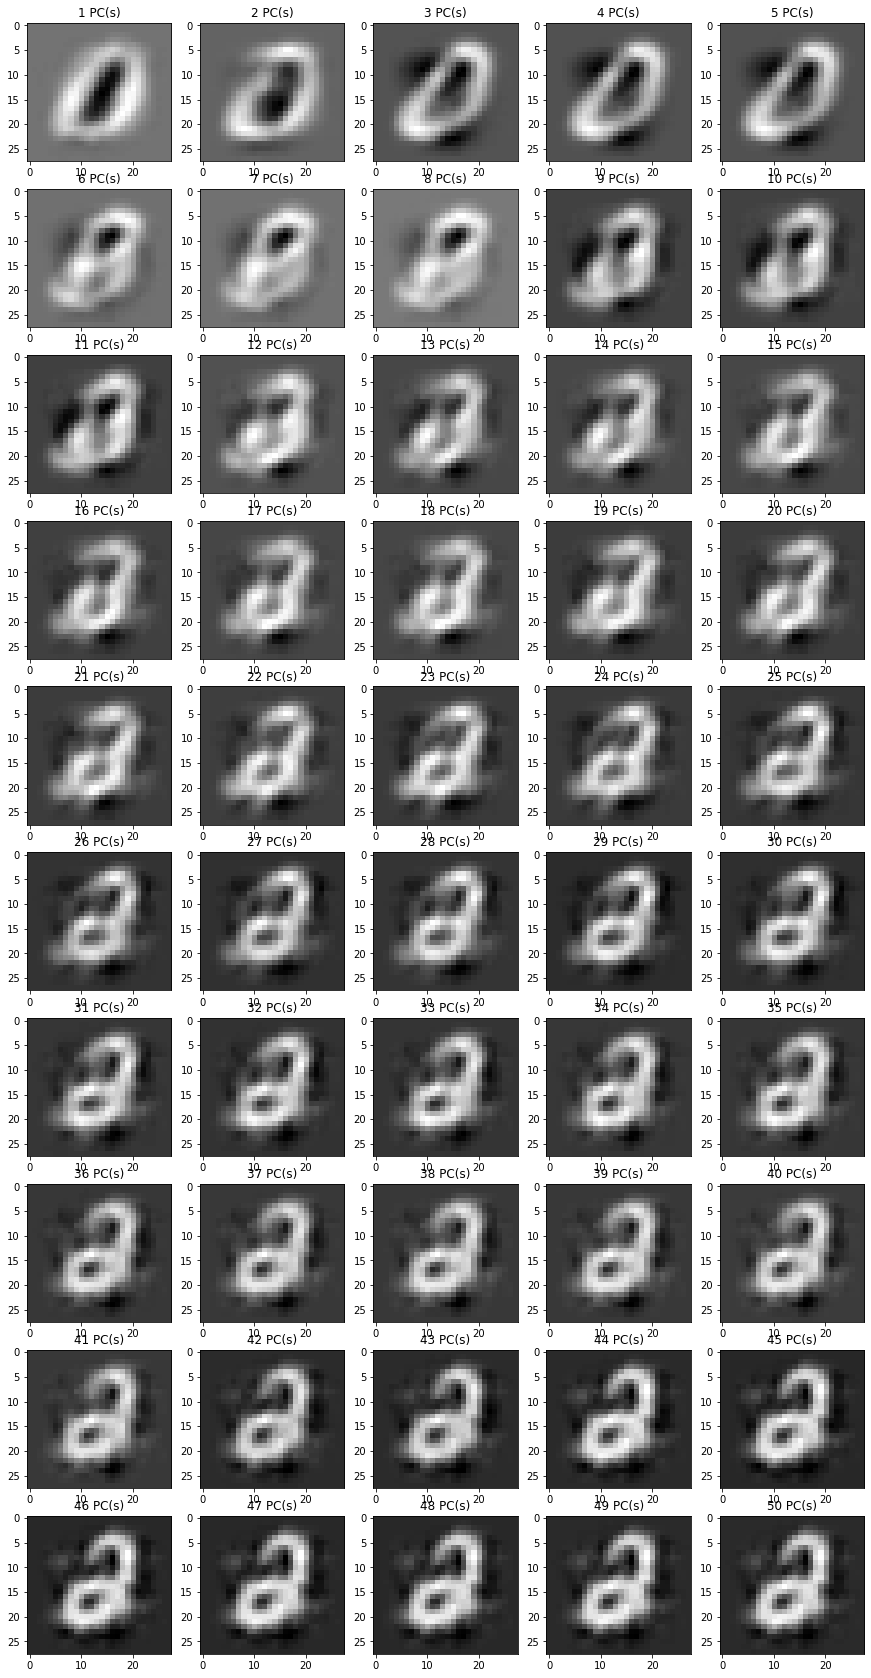

In [ ]:
plot_reconst(50)

#### Digit 6

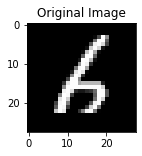

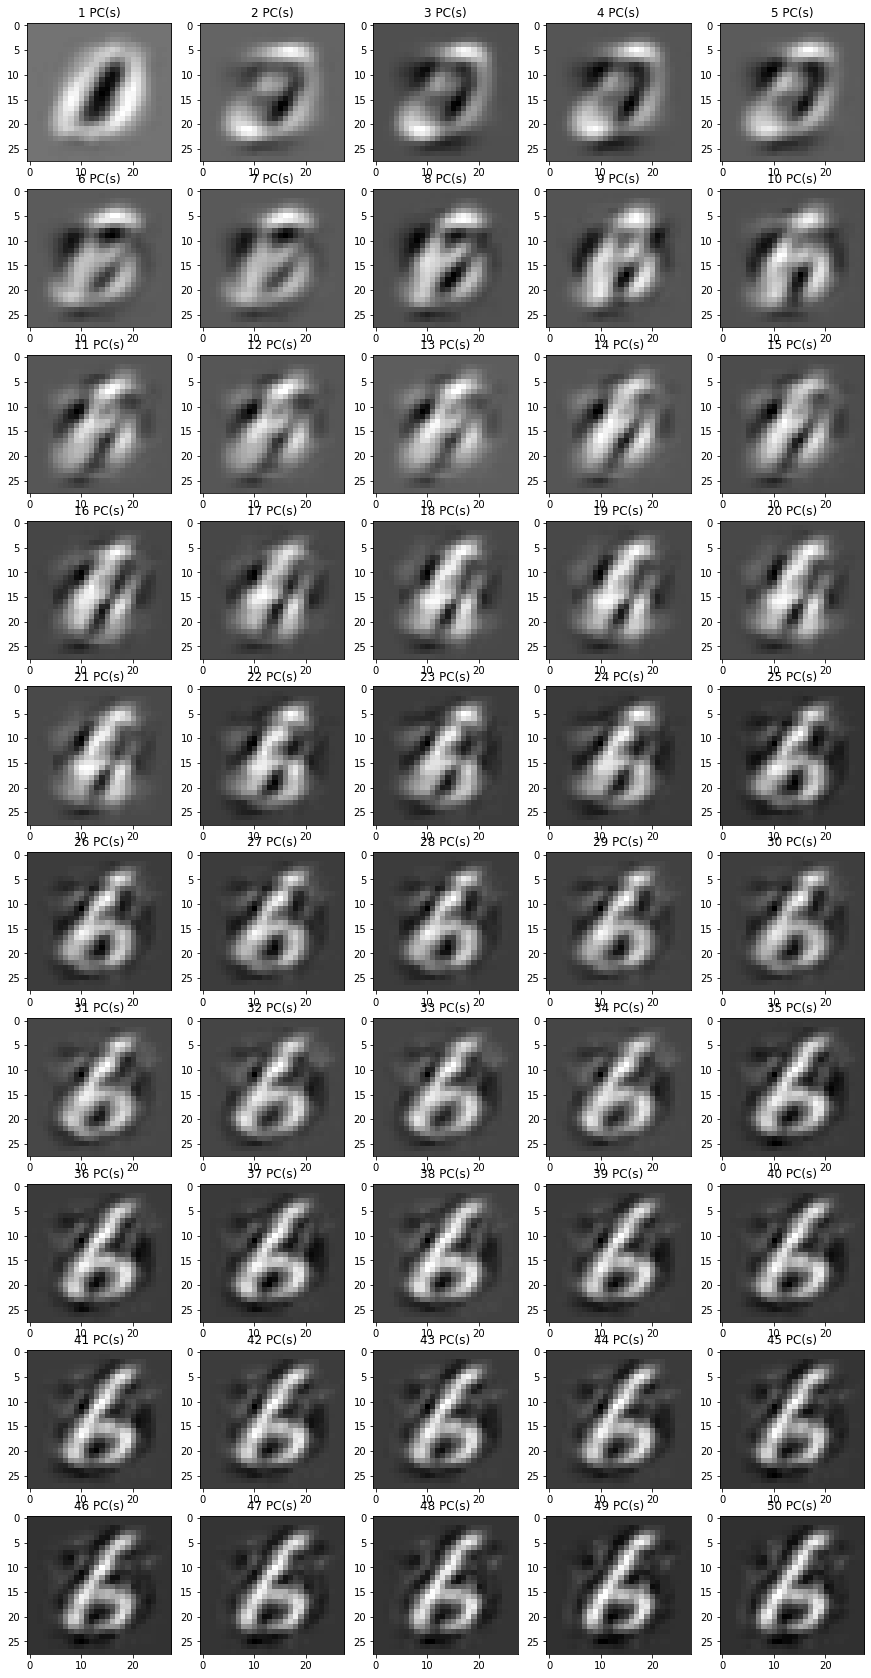

In [ ]:
plot_reconst(50)

#### Digit 4

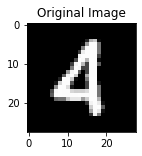

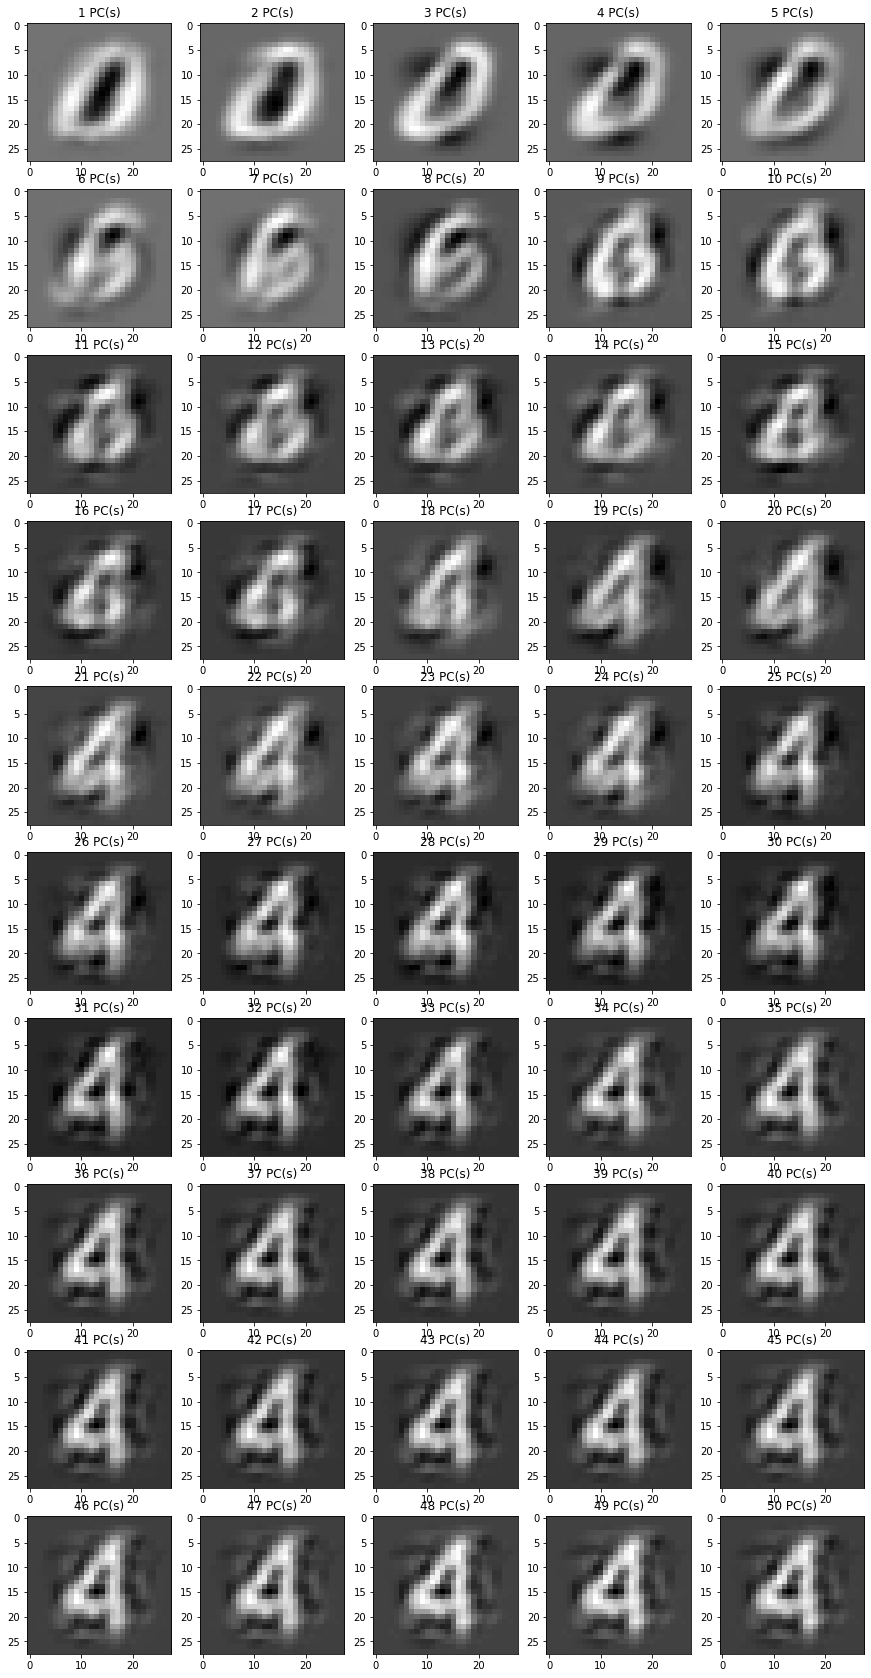

In [ ]:
plot_reconst(50)

#### Digit 3

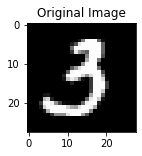

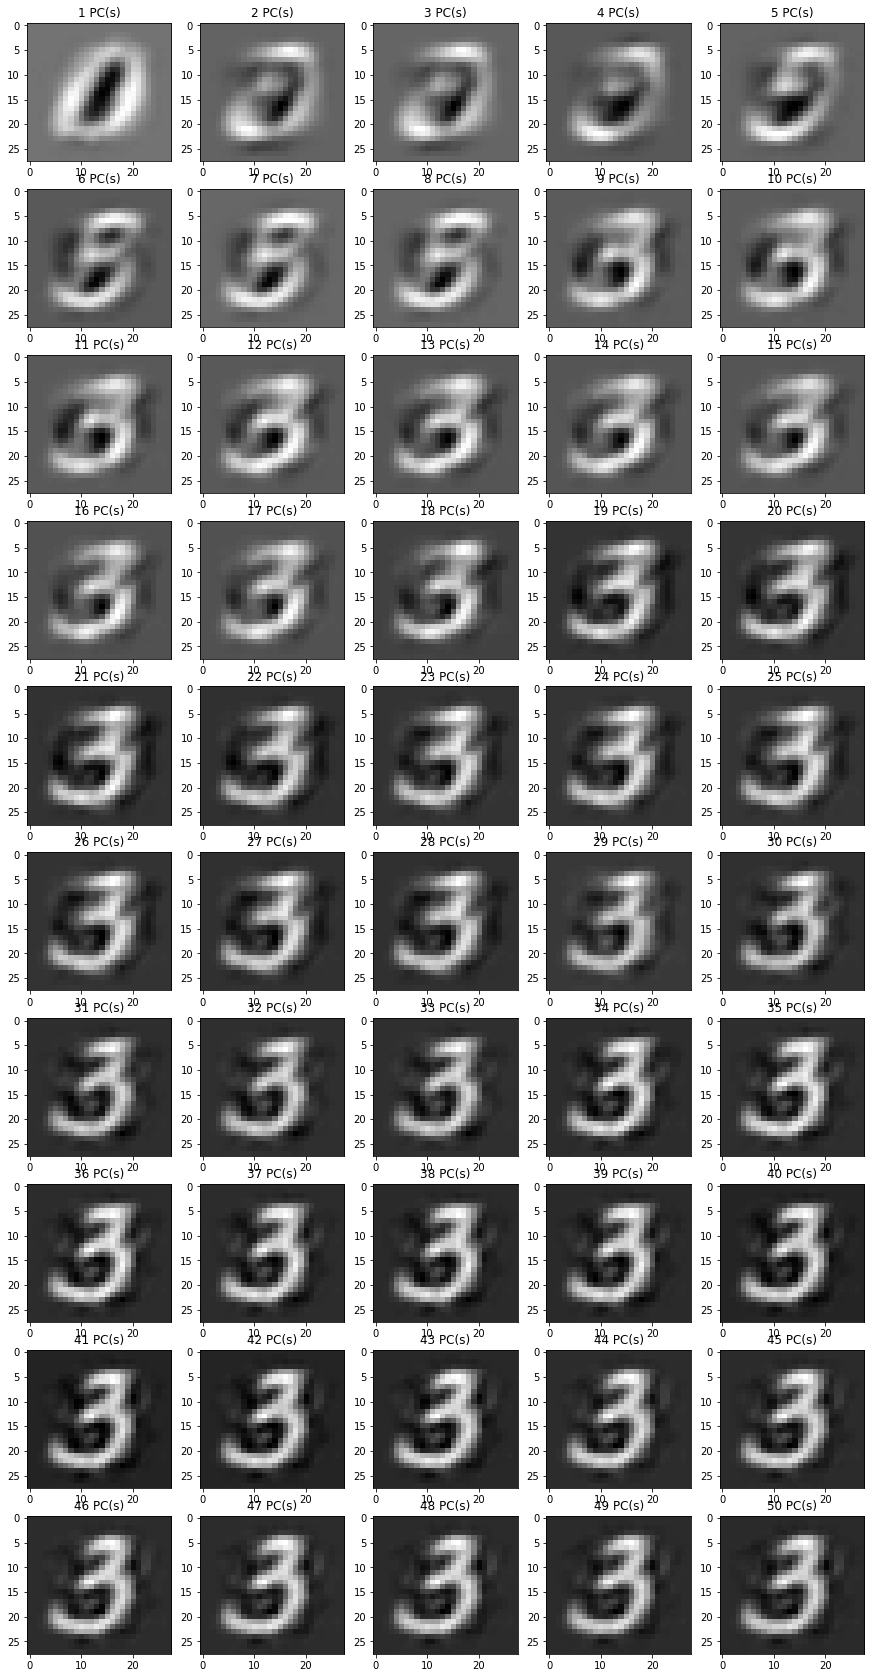

In [ ]:
plot_reconst(50)

#### Comments

It is a little hard to "identify" the digits while already knowing what digit it should be (with the plot of the original image). But looking at the plot of the reconstructions with the first 50 PCs, I think us humans need about **30 to 35 components** to identify the digit correctly. What an improvement from the original 784 features!!

### 5. Compression ratio (for a dataset with 1000 images)

* Original : 1000 images, 784-dim array for each image
  * 1000 x 784 = 784,000 elements

* Using only first 30 components
  * 1000 x 30 = 30,000 elements 
  * Compression Ratio : 784000/30000 = 26.1

* Using only first 35 components
  * 1000 x 35 = 35,000 elements
  * Compression Ratio : 784000/35000 = 22.4

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


